In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 74
lisäpäivillä on 6722 henkilöä
Vaikutus työllisyyteen keskiarvo 2095342 htv, mediaani 2095864 htv std 6377 htv
   keskiarvo 2265876 työllistä, mediaani 2265543 työllistä, std 6370 työllistä


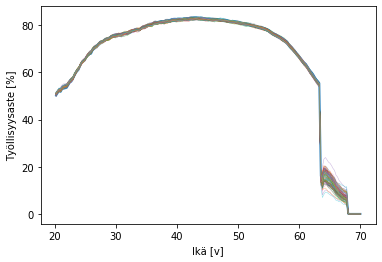

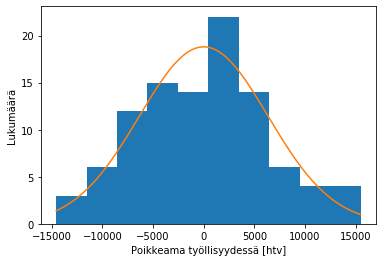

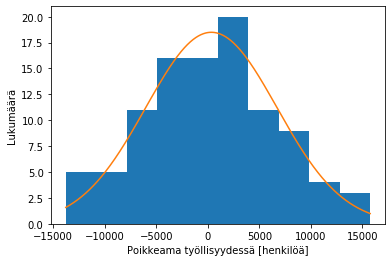

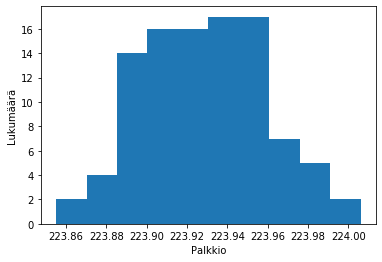

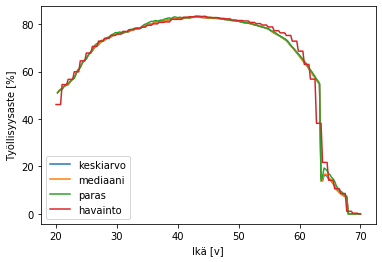

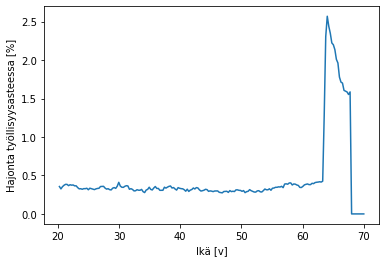

In [3]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/baseline/distrib_base_v',n=100,stats_results='results/baseline/distrib_stats')


# Putken poisto

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

best_emp 83
lisäpäivillä on 0 henkilöä
Vaikutus työllisyyteen keskiarvo 2100274 htv, mediaani 2100232 htv std 7110 htv
   keskiarvo 2270879 työllistä, mediaani 2270454 työllistä, std 6733 työllistä


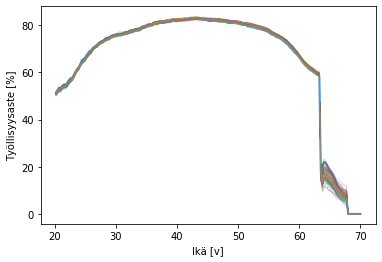

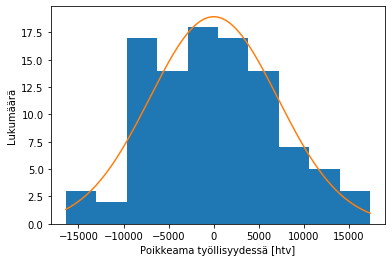

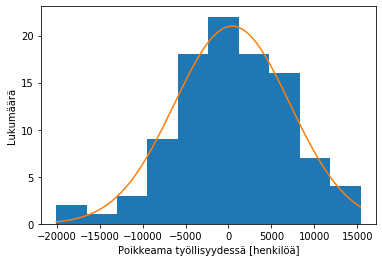

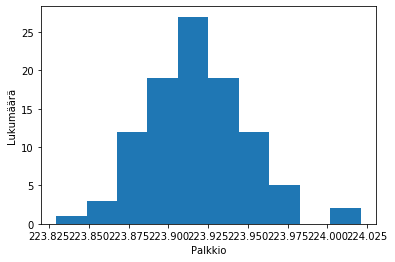

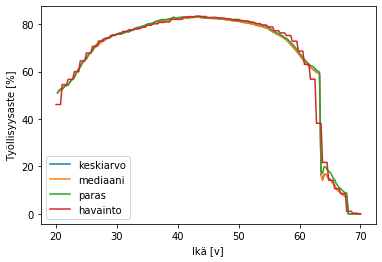

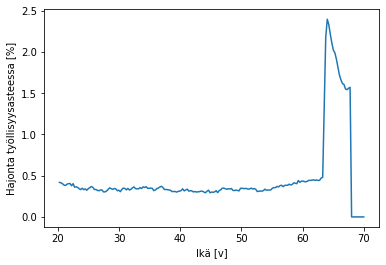

Vaikutus työllisyysasteeseen 4367.5 htv (2100232.0 vs 2095864.5)


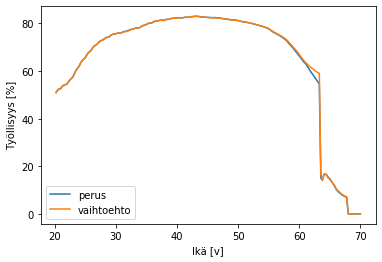

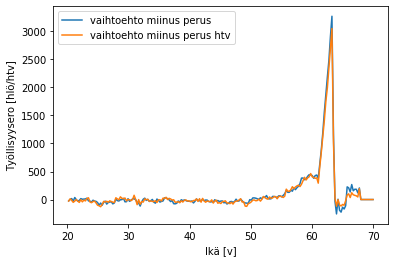

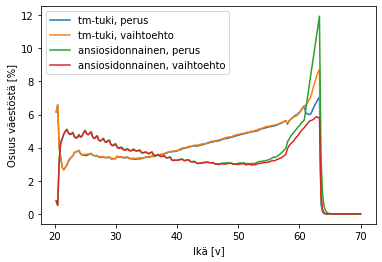

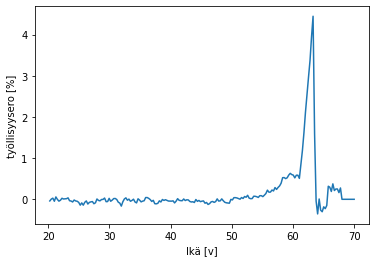

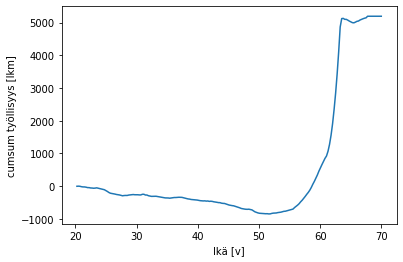

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 4866.8 htv (2100227.837907038 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -822.8 htv (1416662.6548588185 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 4104.2 htv (2090231.280459059 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 3430.7 htv (2080177.7206601393 vs 2076746.997423969)


In [4]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/putki/distrib_poisto_v',n=100,startn=0,stats_results='results/putki/distrib_poisto_stats')
cc2.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')


In [5]:
#cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
#              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc1b.render(load='results/distrib_base_v_100')

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

Vaikutus työllisyysasteeseen 4367.5 htv (2100232.0 vs 2095864.5)


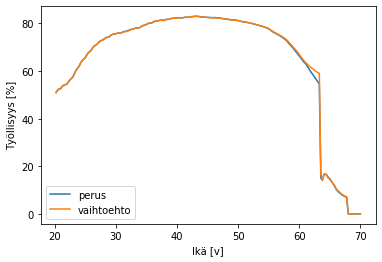

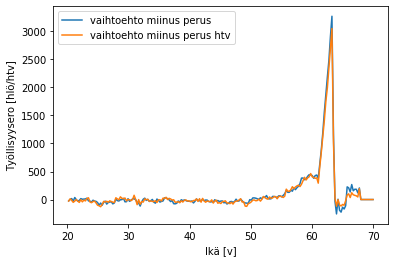

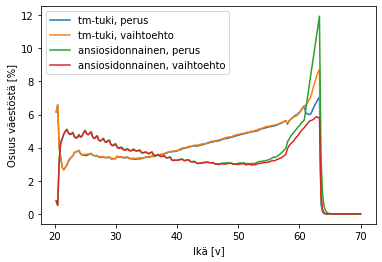

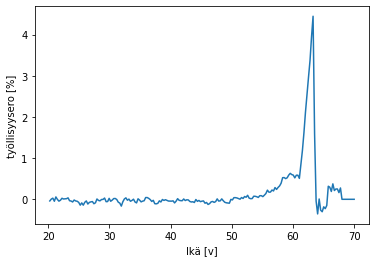

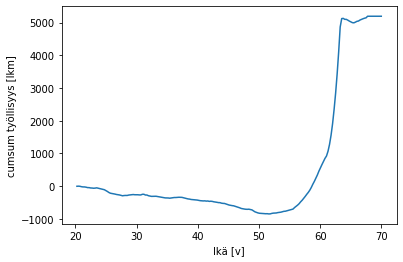

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 4866.8 htv (2100227.837907038 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -822.8 htv (1416662.6548588185 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 4104.2 htv (2090231.280459059 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 3430.7 htv (2080177.7206601393 vs 2076746.997423969)


In [6]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.compare_distrib('results/baseline/distrib_stats','results/putki/distrib_poisto_stats')                    



# Porrastus

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 60
lisäpäivillä on 3245 henkilöä
Vaikutus työllisyyteen keskiarvo 2120492 htv, mediaani 2120853 htv std 7289 htv
   keskiarvo 2294632 työllistä, mediaani 2294055 työllistä, std 7380 työllistä


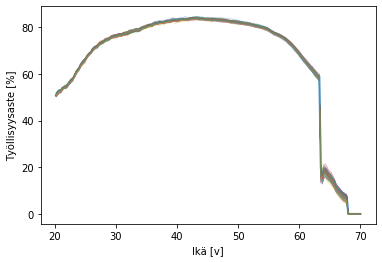

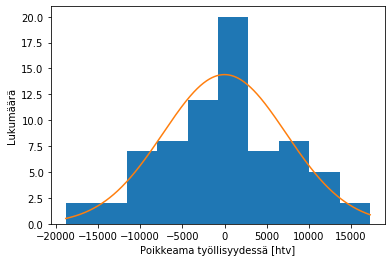

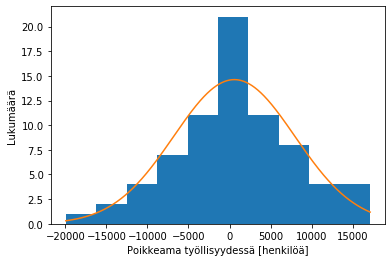

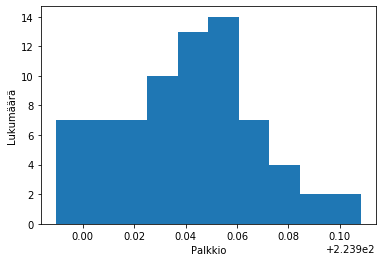

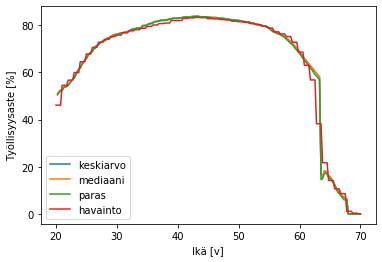

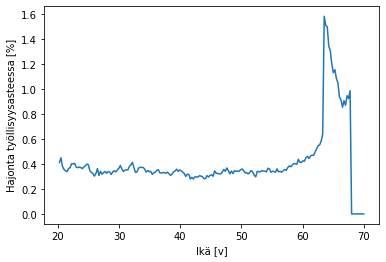

Vaikutus työllisyysasteeseen 24988.5 htv (2120853.0 vs 2095864.5)


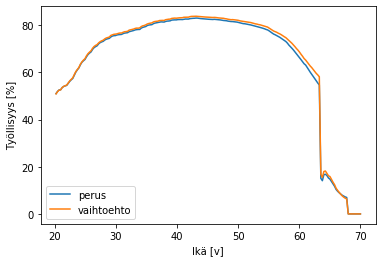

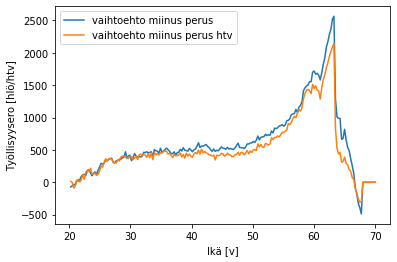

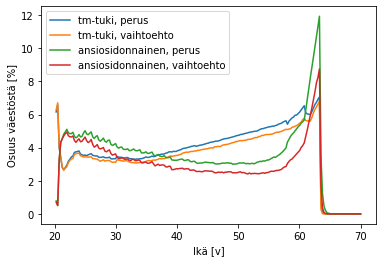

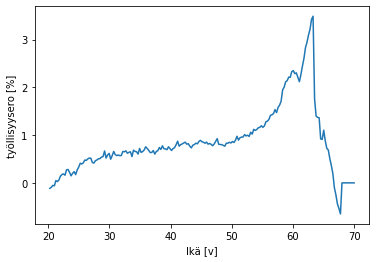

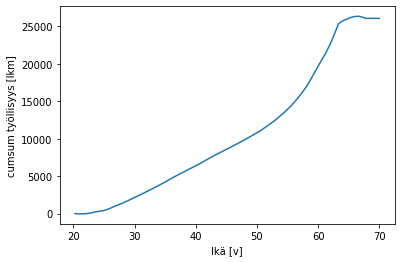

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 25277.5 htv (2120638.507515507 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana 10714.0 htv (1428199.473614446 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 24741.0 htv (2110868.120685775 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 24218.3 htv (2100965.34129902 vs 2076746.997423969)


In [7]:
cc1_porras_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_porras_b.render_distrib(load='results/porrastus/distrib_porras_v',n=73,startn=0,stats_results='results/porrastus/distrib_porras_stats')
cc1_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus/distrib_porras_stats')                    

# 12 kk TOE

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 5
lisäpäivillä on 6328 henkilöä
Vaikutus työllisyyteen keskiarvo 2091670 htv, mediaani 2091854 htv std 7863 htv
   keskiarvo 2265457 työllistä, mediaani 2265364 työllistä, std 8426 työllistä


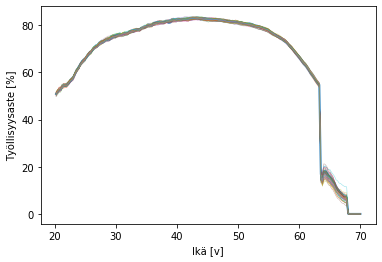

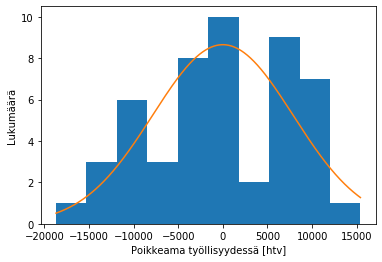

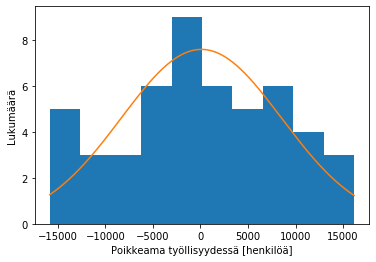

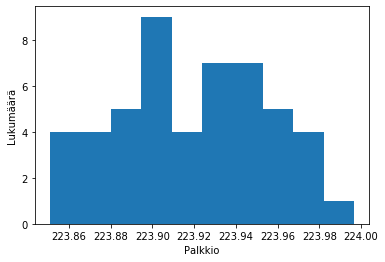

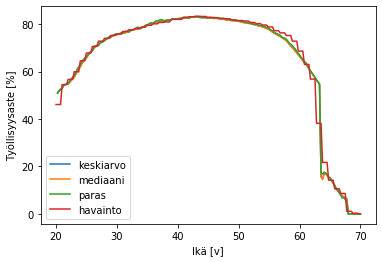

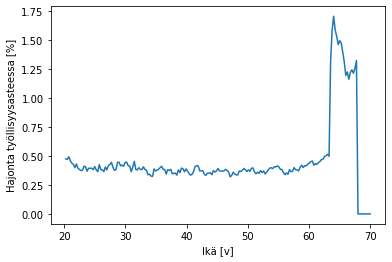

Vaikutus työllisyysasteeseen -4010.0 htv (2091854.5 vs 2095864.5)


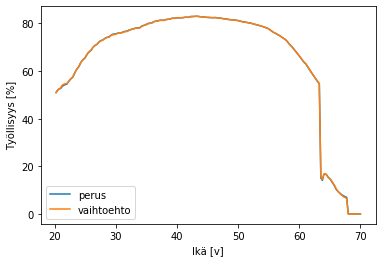

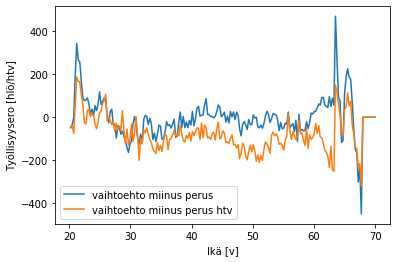

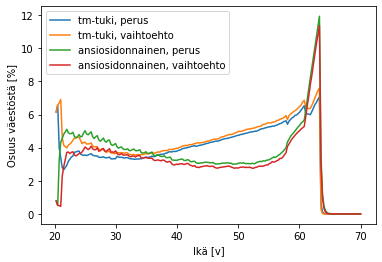

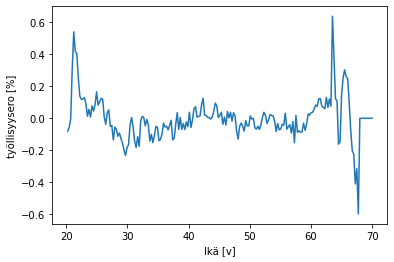

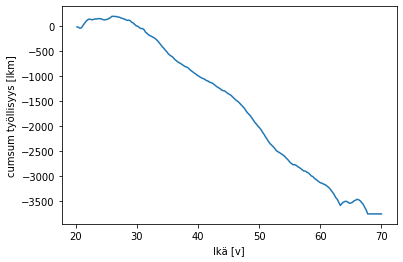

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -3593.4 htv (2091767.6374862455 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -2006.1 htv (1415479.3615352397 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -3530.6 htv (2082596.4648859554 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -3469.5 htv (2073277.499899961 vs 2076746.997423969)


In [8]:
cc1_toe12=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_toe12.render_distrib(load='results/toe12/distrib_toe12_v',n=50,startn=0,stats_results='results/toe12/distrib_toe12_stats')
cc1_toe12.compare_distrib('results/baseline/distrib_stats','results/toe12/distrib_toe12_stats')                    

# 50 pv lyhennys

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 4
lisäpäivillä on 6717 henkilöä
Vaikutus työllisyyteen keskiarvo 2095939 htv, mediaani 2096277 htv std 8308 htv
   keskiarvo 2269342 työllistä, mediaani 2268802 työllistä, std 8185 työllistä


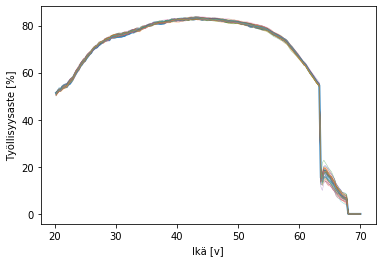

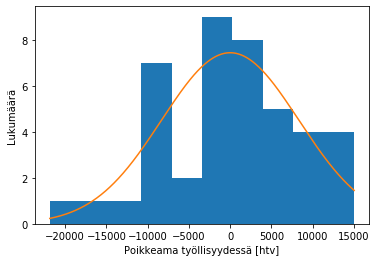

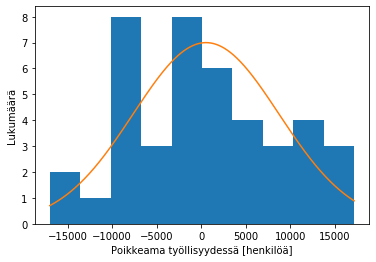

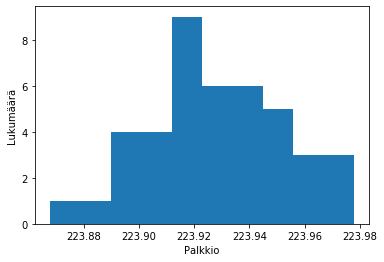

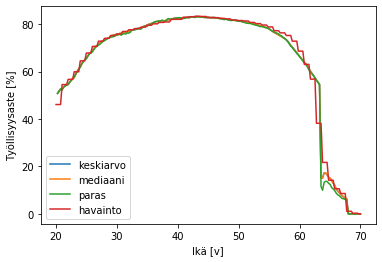

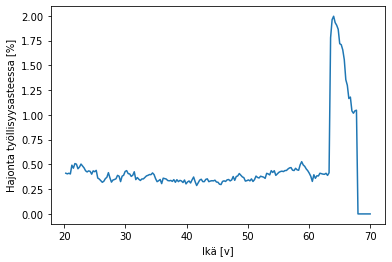

Vaikutus työllisyysasteeseen 412.5 htv (2096277.0 vs 2095864.5)


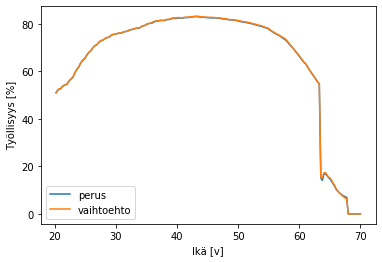

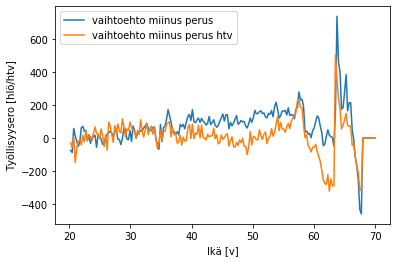

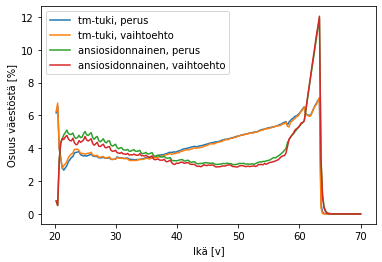

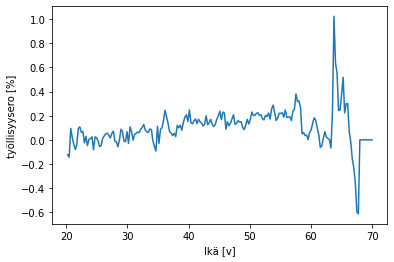

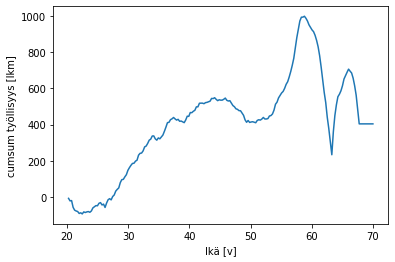

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 233.5 htv (2095594.5311874733 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana 411.8 htv (1417897.3139443265 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 306.1 htv (2086433.242059322 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 378.8 htv (2077125.7694827914 vs 2076746.997423969)


In [9]:
cc1_50_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_50_b.render_distrib(load='results/350/distrib_350_v',n=42,startn=0,stats_results='results/350/distrib_350_stats')
cc1_50_b.compare_distrib('results/baseline/distrib_stats','results/350/distrib_350_stats')                    

# Porrastus ilman vaikutusta putkeen

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 3
lisäpäivillä on 4562 henkilöä
Vaikutus työllisyyteen keskiarvo 2114219 htv, mediaani 2111568 htv std 9064 htv
   keskiarvo 2287848 työllistä, mediaani 2291346 työllistä, std 8799 työllistä


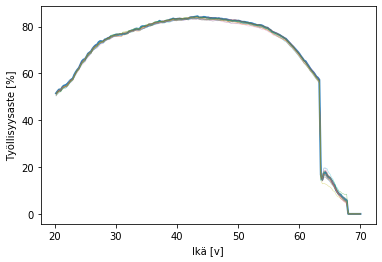

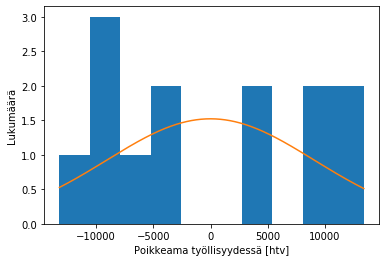

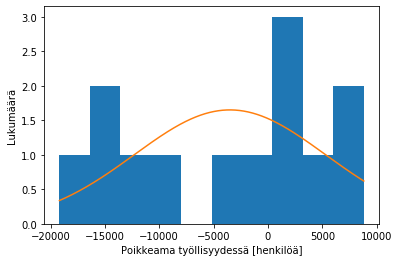

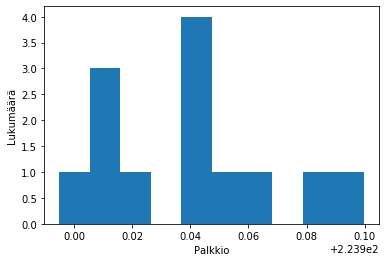

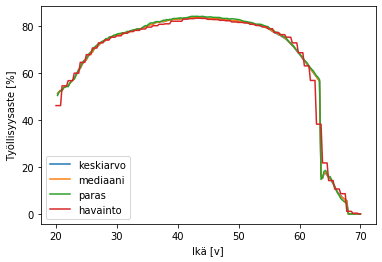

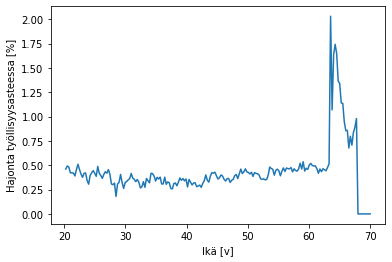

Vaikutus työllisyysasteeseen 15703.5 htv (2111568.0 vs 2095864.5)


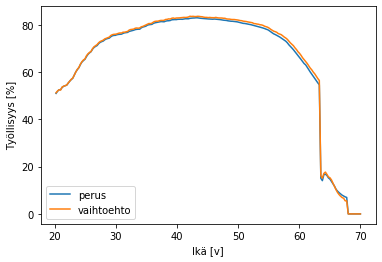

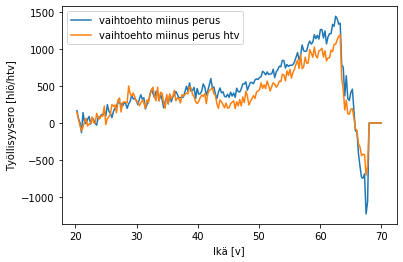

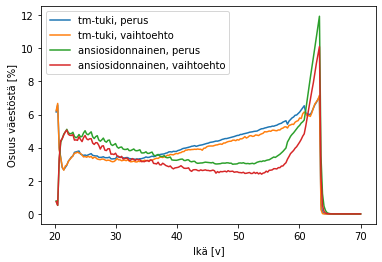

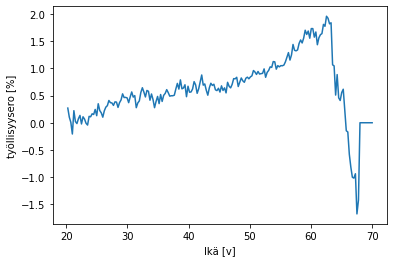

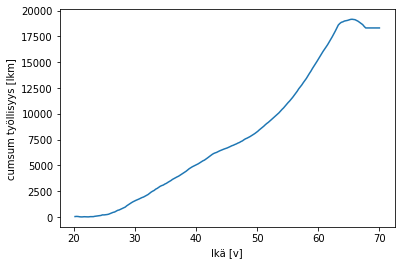

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana 18601.5 htv (2113962.555609743 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana 8176.7 htv (1425662.1433760999 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana 18302.3 htv (2104429.372111344 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana 18008.5 htv (2094755.5215211078 vs 2076746.997423969)


In [10]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_eiputki/distrib_porras_v',n=13,startn=0,stats_results='results/porrastus_eiputki/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_eiputki/distrib_porras_stats')

Vaikutus työllisyysasteeseen -9285.0 htv (2111568.0 vs 2120853.0)


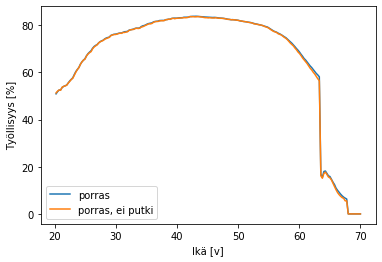

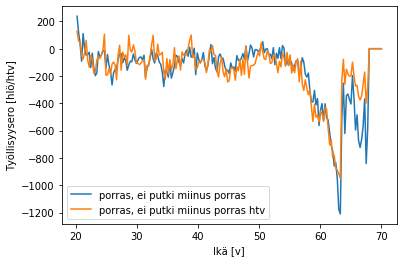

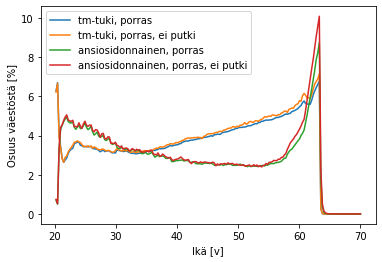

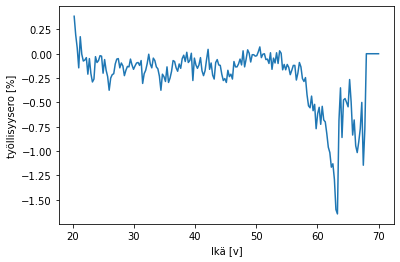

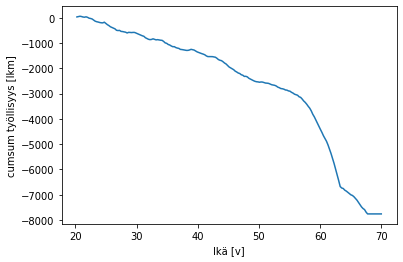

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -6676.0 htv (2113962.555609743 vs 2120638.507515507)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -2537.3 htv (1425662.1433760999 vs 1428199.473614446)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -6438.7 htv (2104429.372111344 vs 2110868.120685775)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -6209.8 htv (2094755.5215211078 vs 2100965.34129902)


In [11]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_eiputki/distrib_porras_stats',label1='porras',label2='porras, ei putki')

# Porrasta vain 1 askel

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

best_emp 1
lisäpäivillä on 6439 henkilöä
Vaikutus työllisyyteen keskiarvo 2083960 htv, mediaani 2080350 htv std 7904 htv
   keskiarvo 2258431 työllistä, mediaani 2256612 työllistä, std 7769 työllistä


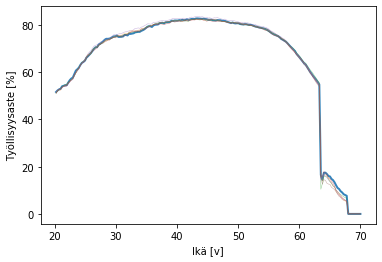

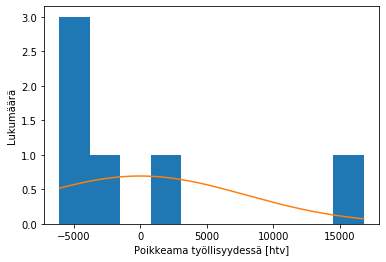

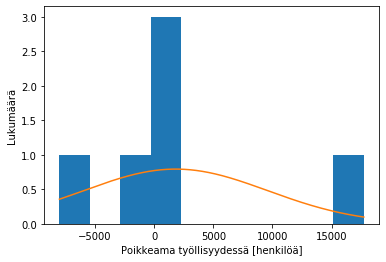

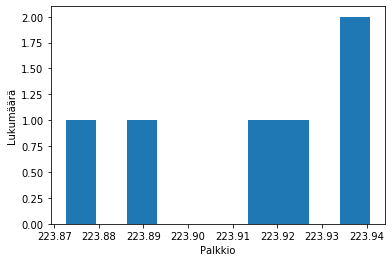

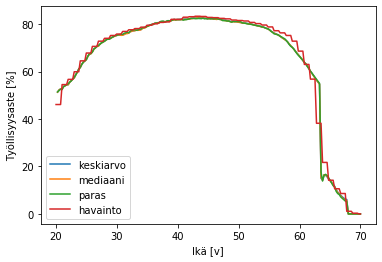

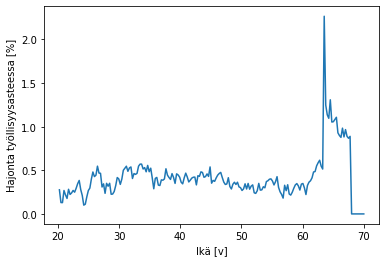

Vaikutus työllisyysasteeseen -15515.0 htv (2080349.5 vs 2095864.5)


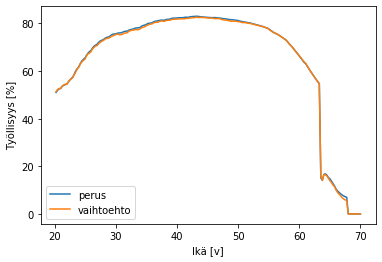

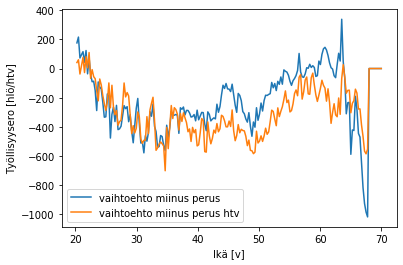

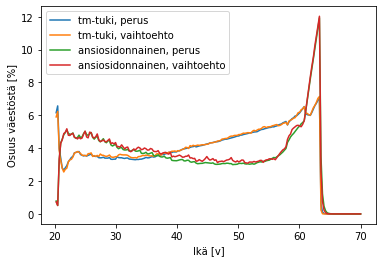

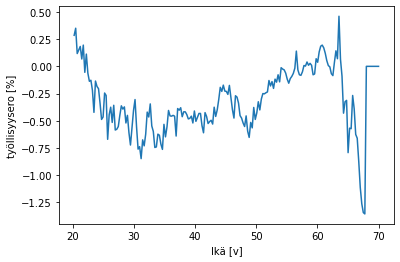

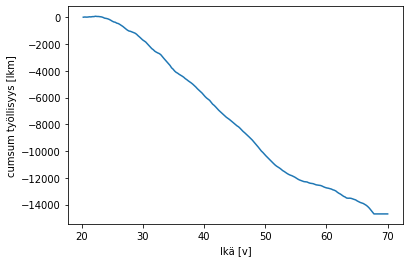

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -13511.5 htv (2081849.544749149 vs 2095361.0231842732)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -10232.9 htv (1407252.5545468184 vs 1417485.4883015708)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -13432.9 htv (2072694.231673919 vs 2086127.1020283108)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -13382.3 htv (2063364.693671218 vs 2076746.997423969)


In [12]:
cc2_porras_b=Lifecycle(env='unemploymentSteps-v1',minimal=False,include_putki=False,mortality=mortality,perustulo=False,randomness=randomness)
cc2_porras_b.render_distrib(load='results/porrastus_1askel/distrib_porras_v',n=6,startn=0,stats_results='results/porrastus_1askel/distrib_porras_stats')
cc2_porras_b.compare_distrib('results/baseline/distrib_stats','results/porrastus_1askel/distrib_porras_stats')

Vaikutus työllisyysasteeseen -40503.5 htv (2080349.5 vs 2120853.0)


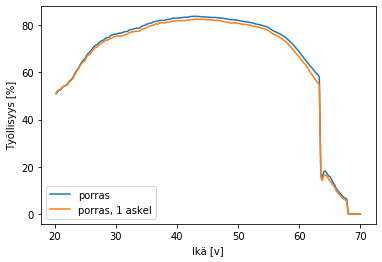

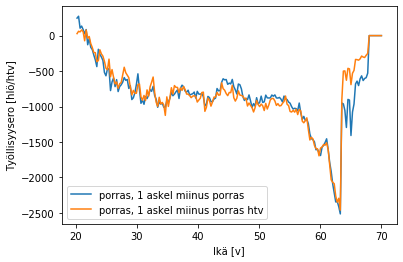

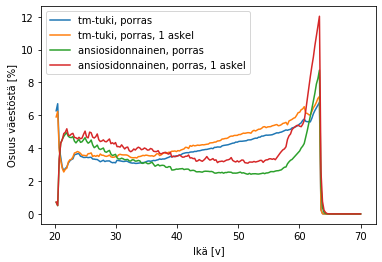

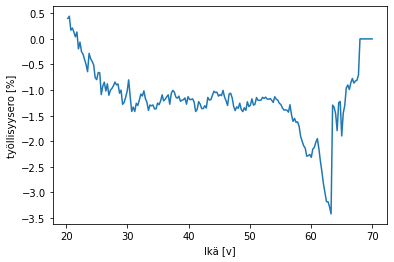

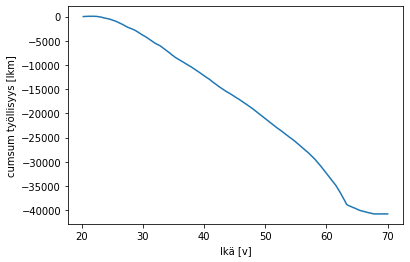

Kumulatiivinen työllisyysvaikutus 63.5 vuotiaana -38789.0 htv (2081849.544749149 vs 2120638.507515507)
Kumulatiivinen työllisyysvaikutus 50 vuotiaana -20946.9 htv (1407252.5545468184 vs 1428199.473614446)
Kumulatiivinen työllisyysvaikutus 63.25 vuotiaana -38173.9 htv (2072694.231673919 vs 2110868.120685775)
Kumulatiivinen työllisyysvaikutus 63 vuotiaana -37600.6 htv (2063364.693671218 vs 2100965.34129902)


In [13]:
cc2_porras_b.compare_distrib('results/porrastus/distrib_porras_stats','results/porrastus_1askel/distrib_porras_stats',label1='porras',label2='porras, 1 askel')

In [14]:
2086215-1.96*6345/10

2084971.38

In [15]:
2086215+1.96*6345/10

2087458.62

In [16]:
0.75*100

75.0